**The goal of this project is to analize the data set about housing prices in the file "house.csv". There are two major parts: 1) predicting continuous"price" variable based on all other variables. 2) predicting "price_bin" variable that represents if the price of a given property is above or below $1M**

In [44]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

# Seting the style of the notebook
sns.set_style('whitegrid')

# creating the Data Frame
original = pd.read_csv('house.csv')

# Displaying the head of the original Data Frame
original.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
# As it can be seen there are all sorts continuous and descrete variables such
# as numbers of floors and bathrooms characterising each property

# id is recorded identification code that was used while compiling the database
# date is date when price was recorded
original.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 1. Prediction of continuous price

In [46]:
# All features except price_bin, since using it to predict price variable would be cheating :)
good_features = original.drop(['price_bin'], axis = 1)

# Displaying the head of the Data Frame
good_features.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


There is an argument as to weather to throw out the "id" variable from the dataset as it logically shouldn't have much to do with the price of the property. Since tree based methods are going to be predominantly used for prediction, additional variables shouldn't be a problem, since if they don't predict price in any real maner they just won't be chosen on splits. That's why appart from risk of overfitting to the training data a little bit, the only consiquence of leaving them in the data set will be that algorithms will take a bit longer.

In [47]:
# transforming the date variable to be usable by the algorithms. Now it represents
# number of days since first day of recording the data

dates = (original['date'].apply(lambda x: datetime(year=int(x.split('T')[0][0:4]), month=int(x.split('T')[0][4:6]),day=int(x.split('T')[0][6:8]))))
mindate = min(dates)
dates = dates.apply(lambda x:(x - mindate).days)
good_features['date'] = dates

In [48]:
good_features.head() # This is how the head of the DF looks now

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = good_features.drop('price', axis = 1)  # X - features
y = good_features['price']                 # y - variable that is being predicted

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 420)

After trying several regressors I came to the conclusion that tree based methods show the best results in predicting the price, hence I'm going use Random Forest Regressor

In [51]:
# import a Ranfom Forest Regressor
from sklearn.ensemble import RandomForestRegressor 

# initiate a Random Forest Regressor
rfr = RandomForestRegressor(n_estimators = 200)    

# train a Random Forest Regressor
rfr.fit(X = X_train, y = y_train)                  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
# Calculate how well does the regressor perform

from sklearn import metrics

predictions = rfr.predict(X_test)

print ('Explained variance', metrics.explained_variance_score(predictions, y_test)) 

Explained variance 0.8618927649549537


As it can be seen the explained variance is already pretty high, and the prediction ability is already pretty good (See scatter plot below)

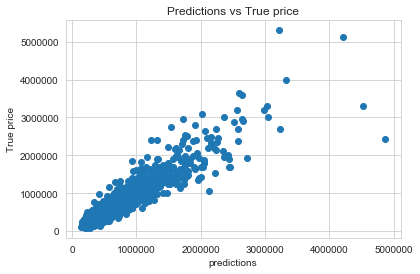

In [53]:
# Making of a scatter plot

plt.title('Predictions vs True price')
plt.xlabel('predictions')
plt.ylabel('True price')
plt.scatter(x = predictions,y = y_test)

Next let's pay attention to Explained Varience result and try to improve that. The value above is our reference score

In the attempts to improve the model I have decided the library that implements technique that is also based on decision trees called **Extreme Gradient Boosting**, and is implemented in the module called xgboost

In [54]:
import xgboost as xgb                                                        # impoert XGB library

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200) # initialize XGBRegressor

xg_reg.fit(X_train,y_train)                                                  # fit XGBRegressor

preds_xgb = xg_reg.predict(X_test)                                           # calculate predictions for the test set

In [55]:
# Calculate how well does the regressor perform

print ('Explained variance', metrics.explained_variance_score(preds_xgb, y_test))

Explained variance 0.8730667512460615


As it can be seen the explained variance is already somewhat improved by using XGBoost

### Search for the right hyperparemeters

In [56]:
# importing some important modules for hyperparameter tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

In [57]:
# Parameters to be randomly sampled by RandomizedSearchCV

params = {
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

In [58]:
# initializing new XGB Regressor
xgb_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100) 

# number of folds in K Fold cross validation
folds = 5 

In [59]:
# Searching the space of hyperparameters in a random way using RandomizedSearchCV function


# initializing random search
random_search = RandomizedSearchCV(estimator=xgb_reg2, param_distributions=params, scoring='explained_variance',
                                   n_jobs=-1, cv=folds, verbose=1, refit=True, n_iter= 20, random_state=42)

# fitting RandomizedSearchCV instance to the data
random_search.fit(X_train, y_train)         

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

*Note: only training set is used during hyperparameter tuning. X_test is used for validation later*

In [60]:
print('\n Best parameters:')
print(random_search.best_params_)


 Best parameters:
{'subsample': 0.8, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1}


In [61]:
# initializing a new XGBRegressor with best parameters and higher number of estimators

xgb_reg3 = xgb.XGBRegressor(objective ='reg:squarederror',
                            gamma=random_search.best_params_['gamma'], learning_rate = random_search.best_params_['learning_rate'],
                            max_depth = random_search.best_params_['max_depth'],subsample = random_search.best_params_['subsample'], 
                            n_estimators = 200)

# [re]fitting the new regressor to all of the training data

xgb_reg3.fit(X_train, y_train)

# calculating new predictions based on the new regressor

predictions_refit = xgb_reg3.predict(X_test)


In [62]:
# Calculate how well does the regressor perform

print ('Refited Explained variance', metrics.explained_variance_score(predictions_refit, y_test))

Refited Explained variance 0.8933260551945663


As can be seen tuning of the hyper parameters gave an increase of several percentages of explained variance

## 2. Prediction of "price_bin" variable

In this chapter the "price_bin" binary variable will be predicted. It is a variable with highly imbalanced classes. Number of "0"s is much higher than number of "1"s. This issue will be adressed a bit later

In [63]:
# importing some important modules for classification


from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
# turning off warnings from jupyter notebook

import warnings
warnings.filterwarnings('ignore')

There are a lot of different methods to classify a variable. Such as logistic regression, Support Vector Machines and Bayes classifiers. Since XGBoost showed such a good result in the regression section, it is going to be used here as well. 

In [65]:
# hyperparameteter space for XGBClassifier

params_class = {
        'scale_pos_weight': [1, 2, 5, 10, 15],
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

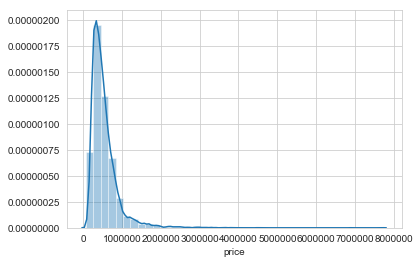

In [66]:
# Showing the imbalanced distribution of prices ( most of them are less than $1 mln )

sns.distplot(a = (good_features['price']), bins = 40)

In [67]:
X = good_features.drop(['price'],axis = 1)         # X - features      
y = original['price_bin']                          # y - variable that is being predicted (this time binary price)
                       
# Train test split
                       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [68]:
# Instantiating XGBClassifier
xgb_class = XGBClassifier(objective='binary:logistic', nthread=-1, n_estimators=40)

# Number of folds to be used in Stratified K fold cross validation
folds = 5

# Instantiating Stratified K fold cross validation (it is a specific
# type of K fold cross validation that is built to deal with imbalanced classes)

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001) 

# Instantiating RandomizedSearchCV
random_search_class = RandomizedSearchCV(estimator=xgb_class, param_distributions=params_class,n_iter= 20,
                                         scoring='f1',refit=True, cv=skf.split(X_train,y_train), verbose=1, 
                                         random_state=42)

In [69]:
# Fitting RandomizedSearchCV object to the training data

random_search_class.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000214A4215258>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=40,
                                           n_jobs=1, nthread=-1,
                                           objective='binary:log...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'gamma

In [70]:
print('\n Best parameters:')
print(random_search_class.best_params_)


 Best parameters:
{'subsample': 0.8, 'scale_pos_weight': 2, 'max_depth': 8, 'learning_rate': 0.4, 'gamma': 0.1}


In [71]:
# calculating class predictions

class_preds = random_search_class.best_estimator_.predict(X_test)

In [72]:
# Displaying Confusion matrix

print ('confusion matrix: \n', confusion_matrix(y_test, class_preds))

confusion matrix: 
 [[2954   48]
 [  68  172]]


In [73]:
# Displaying Classification report

print ('classification report: \n', classification_report(y_test, class_preds))

classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3002
           1       0.78      0.72      0.75       240

    accuracy                           0.96      3242
   macro avg       0.88      0.85      0.86      3242
weighted avg       0.96      0.96      0.96      3242



*Note: scale_pos_weight parameter can be used to tune the number of points that will be classified as "1". This means that in some sence there will be a trade-off between precision and recall in "1" class*

In order to adress this issue of imbalanced classes in a different way, several methods can be used. Undersampling "0" class in the training set is one of them. 
*Note: in case it is very important for classification to always identify class "1" correctly such method can be used*

**Undersampling**, is a method in which only a subset of the majority class is used to train the model

In [74]:
from imblearn.under_sampling import ClusterCentroids # importing ClusterCentroids for the purpose of undersampling

# Calculating cluster Centroids
cc = ClusterCentroids(random_state=42)

# Calculating new, undersampled feature and target variable vectors
X_under, y_under = cc.fit_resample(X_train, y_train)

In [75]:
# Displaying that, new vectors contain the same number of 0 class instances as 1 class

print ('number of instances of class "0": ', len(y_under)-sum(y_under))
print ('number of instances of class "1": ', sum(y_under))

number of instances of class "0":  1225
number of instances of class "1":  1225


In [76]:
# hyper parameteter space for XGBClassifier

params_under = {
        'learning_rate': [0.05, 0.1, 0.2,0.4, 0.6],
        'gamma': [0.01, 0.1, 0.3, 0.8, 5, 15],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

In [77]:
# Initializing randomized search for undersampled data

random_search_under = RandomizedSearchCV(estimator=xgb_class, param_distributions=params_under,n_iter= 20,
                                         scoring='f1',refit=True, cv=skf.split(X_under,y_under), verbose=1, 
                                         random_state=42)

# fitting RangomizedSearchCV instance to the undersampled training data

random_search_under.fit(X_under, y_under)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000214A4215AF0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=40,
                                           n_jobs=1, nthread=-1,
                                           objective='binary:log...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [78]:
print('\n Best parameters:')
print(random_search_under.best_params_)


 Best parameters:
{'subsample': 0.6, 'max_depth': 6, 'learning_rate': 0.4, 'gamma': 0.01}


In [79]:
# predicting class labels

class_preds_under = random_search_under.best_estimator_.predict(X_test)

In [80]:
# Displaying confusion matrix

print ('confusion matrix: \n', confusion_matrix(y_test, class_preds_under))

confusion matrix: 
 [[2250  752]
 [   4  236]]


In [81]:
# Displaying classification report

print ('classification report: \n', classification_report(y_test, class_preds_under))

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86      3002
           1       0.24      0.98      0.38       240

    accuracy                           0.77      3242
   macro avg       0.62      0.87      0.62      3242
weighted avg       0.94      0.77      0.82      3242



As can be seen the recall value got much better for class 1, while precision for 1 and recall for 0 got much worse. This examplifies the trade-off. Depening on what is the goal of classification, different strategies will show the best result.

### Conclusions

This project is about analyzing the data concerning house prices stored in the file "house.csv" in the repository. Several models were built in order to predict continuous "price" and binary "price_bin" variables. The best result for a regression was achieved by using XGBoost library. Explained variance in the best model was around **0.9**.
There are several ways in which the given result could be improved. One is to generate new features for machine leaning algorithm. For example a geographycal feature can be constructed based on "lat" and "long" columns. Other regression methods that aren't based on decision trees may be tested as well.

As far as prediction of "price_bin" column, XGBoost was used as well. Best score as measured by f1 metric was **0.86** or as measured by weighted f1 metric: **0.96**. The result of classification is based on the goal of classification and importance of specific metrics, be it precision, or recall of a certain class. There are many other available methods that can be used for classification that can potentially give a better result.